# Homework Data Visualization

- Nama: Agi Rahmawandi
- Cita-cita semasa kecil: Jadi Peter Parker

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# please import as much as you need

In [120]:
# read your data

df = pd.read_csv('telco_customer.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.select_dtypes('object').describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [ ]:
df.info()

# Normal

## Dalam rata-rata, payment method mana yang memiliki monthly charge terbesar per customernya?

Hint: Gunakan groupby payment method terhadap monthly charge dengan aggregate function rata-rata

In [139]:
df_pay = (df.groupby('PaymentMethod', as_index=False)
          ['MonthlyCharges'].mean()
          .sort_values('MonthlyCharges', ascending=False)
          .round(2))

df_pay

,PaymentMethod,MonthlyCharges
2,Electronic check,76.26
0,Bank transfer (automatic),67.19
1,Credit card (automatic),66.51
3,Mailed check,43.92


In [140]:
fig = px.bar(df_pay, x="PaymentMethod", y="MonthlyCharges", text_auto=True,height=500,width=900)
fig.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa metode pembayaran electronic check memiliki rata-rata monthly charges terbesar **76.2** , dan yang paling sedikit adalah metode pembayaran dengan Mailed check sebesar **43.9**

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Bagaimana jumlah customer dilihat dari tenure group?

Tenure group:
- low_tenure: User dengan tenure < 21 bulan
- medium_tenure: User dengan tenure 21 - 40 bulan
- high_tenure: User dengan tenure > 40 bulan

Hint:
- Memotong data integer menjadi group categorical dapat menggunakan beberapa macam cara, contohnya dengan numpy.where atau pandas.cut
- Mirip dengan plot pertama, namun ini menghitung jumlah unique users

In [146]:
# Definisi tepian (bins) dan label
batas  = [0, 21, 41, np.inf]      # [0,20)  [21,40)  [41,∞)
label  = ["low_tenure", "medium_tenure", "high_tenure"]

df["tenure_group"] = pd.cut(
   df["tenure"],
    bins=batas,
    labels=label,
    right=False,          
    include_lowest=True  
)

#cek hasil kategori
#df_g= df.groupby('tenure_group',observed=False)['tenure'].agg(["count", "min", "max"]).sort_index()

df_tg = (
    df.groupby('tenure_group', observed=False)   
      ['customerID'].nunique() 
      .reset_index()           
      .sort_values('customerID', ascending=False)
)

fig = px.bar(df_tg,x="tenure_group", y="customerID", text_auto=True,height=500,width=900)
fig.show()

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

Jadi, dari plot di atas, kami menyimpulkan bahwa masa berlangganan(tenure) pada kategori low dan high hampir sama **2788** dan **2757**, namun pada kategori medium tergolong sedikit yakni **1408**. kategori langganan yang banyak diminati pasar adalah di rentang **1 sampai dengan 20 bulan** dan tentang tenure antara **21 sampai 40** merupakan kategori yang kurang diminati pasar.

## Apakah kebanyakan dari Senior Citizen berlangganan PhoneService?

Hint:
- Dapat menggunakan feature/input parameter hue pada seaborn
- Dalam menghitung jumlah unique customer, jangan lupa perhatikan angka rasio, tidak hanya angka absolutnya



In [6]:
df_grp = (
    df.groupby(['SeniorCitizen', 'PhoneService'])
      .agg(TotalCustomer=('customerID', 'nunique'))
      .reset_index()
      .assign(
          Percentage=lambda d: (
              d.groupby('SeniorCitizen')['TotalCustomer']
               .transform(lambda x: (x / x.sum() * 100).round(2))
          ),
            Percentage_total=lambda x: (
              x['TotalCustomer'] / x['TotalCustomer'].sum() * 100
          ).round(2)
      
      )
)

# df_grp = df_grp[df_grp['SeniorCitizen'] == 1]   # filter di sini
print(df_grp)


   SeniorCitizen PhoneService  TotalCustomer  Percentage  Percentage_total
0              0           No            578        9.79              8.21
1              0          Yes           5323       90.21             75.58
2              1           No            104        9.11              1.48
3              1          Yes           1038       90.89             14.74


<Axes: xlabel='SeniorCitizen', ylabel='Percentage'>

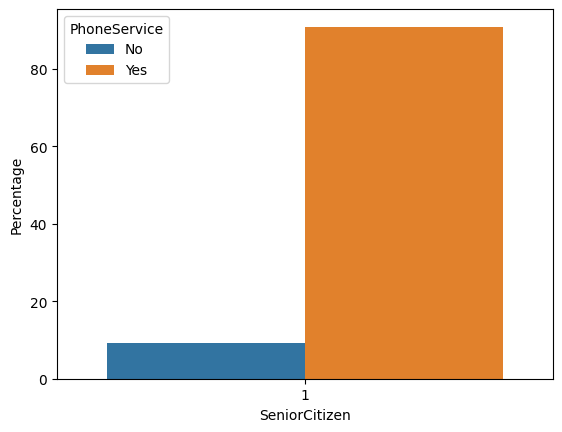

In [13]:
sns.barplot(x='SeniorCitizen',y='Percentage',data=df_grp[df_grp['SeniorCitizen']==1], hue='PhoneService')

Jadi, dari plot di atas, dapat disimpulkan bahwa 91% dari Senior Citizen berlangganan phone service, dan sisanya 9% tidak berlangganan phone service, 

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Bagaimana Distribusi dari TotalCharge?

Hint:
- Ubah datatype TotalCharge dari object ke int atau float
- Buat distribusi plot!

In [22]:
# # your code goes here!

# Hitung nilai kosong/spasi
# print(df['TotalCharges'].value_counts(dropna=False))
# Replace
df['TotalCharges'] = df['TotalCharges'].replace(['', ' '], np.nan)

df['TotalCharges'] = df['TotalCharges'].astype(float)


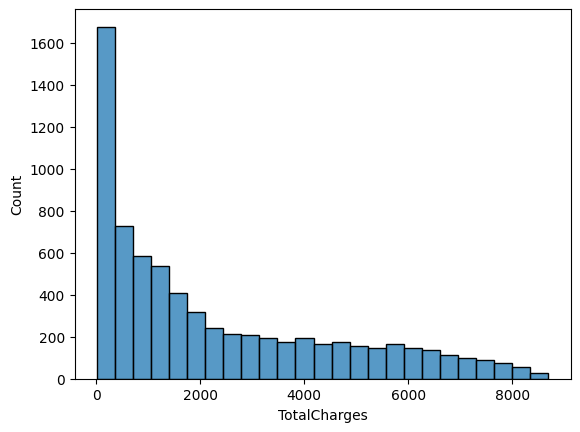

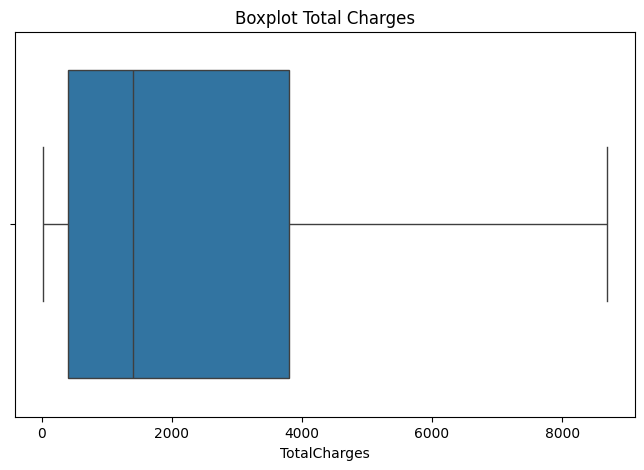

mode: 20.2


count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [26]:
sns.histplot(df['TotalCharges'])

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='TotalCharges')
plt.title('Boxplot Total Charges')
plt.show()

print('mode:',df['TotalCharges'].mode().iloc[0])
df['TotalCharges'].describe()

Jadi, dari plot di atas, dapat disimpulkan bahwa dari sebaran datanya dapat dilihat bahwa Totalcharges menumpuk atau terkonsetrasi disebelah kiri

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

# Intermediate

## Apakah customer yang memiliki monthly charges yang tinggi cenderung churn?

Hint: dapat ditunjukan melalui distribusi data

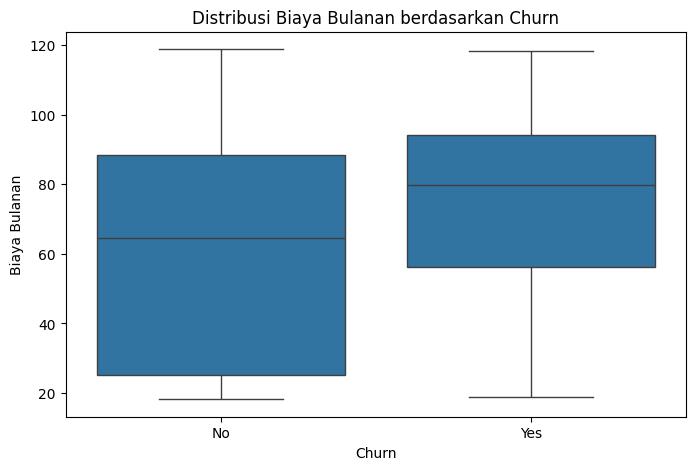

In [5]:
# your code goes here!
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Distribusi Biaya Bulanan berdasarkan Churn')
plt.xlabel('Churn')
plt.ylabel('Biaya Bulanan')
plt.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa dari data diatas dengan melihat sebaran data pelanggan dengan yang biaya bulanan tinggi lebih memilih churn/berhenti berlangganan, ada beberapa faktor yang perlu dikaji lebih dalam mengenai hal ini, bisa berkaitan dengan kepuasan pelanggan, dimana bisa ditelaah lagi apakah pelanggan dengan yang memebayar biaya bulan lebih tinggi merasa tidak puas dengan layanan tersebut.

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Bagaimana pengaruh memiliki partner & dependents terhadap tingkat churn customer?

Hint: concat partner dan dependents, gunakan parameter 'hue' pada seaborn untuk mempermudah

In [4]:
df_stat = pd.read_csv('telco_customer.csv')

In [5]:
def combine_status (row):
    if (row['Partner']=='Yes' and row['Dependents']=='Yes') :
        return 'Partner & Dependents' 
    elif (row['Partner']=='Yes' and row['Dependents']=='No') :
        return 'Partner Only' 
    elif (row['Partner']=='No' and row['Dependents']=='Yes') :
        return 'Dependents Only' 
    else:
        return 'No Partner & No Dependents'

In [6]:
df_stat['fam_stat']= df_stat.apply(combine_status, axis=1)


In [41]:

df_group =  (df_stat[df_stat['Churn'] == 'Yes']
             .groupby(['fam_stat','Churn'])
             .agg(Total_cust=('customerID','nunique'))
             .reset_index()
             .assign(Percentage_total=lambda x: (
                 x['Total_cust'] / x['Total_cust'].sum() * 100).round(2))
                .sort_values('Total_cust', ascending=False)
        
)
     
df_group

,fam_stat,Churn,Total_cust,Percentage_total
1,No Partner & No Dependents,Yes,1123,60.09
3,Partner Only,Yes,420,22.47
2,Partner & Dependents,Yes,249,13.32
0,Dependents Only,Yes,77,4.12


<Axes: xlabel='Percentage_total', ylabel='fam_stat'>

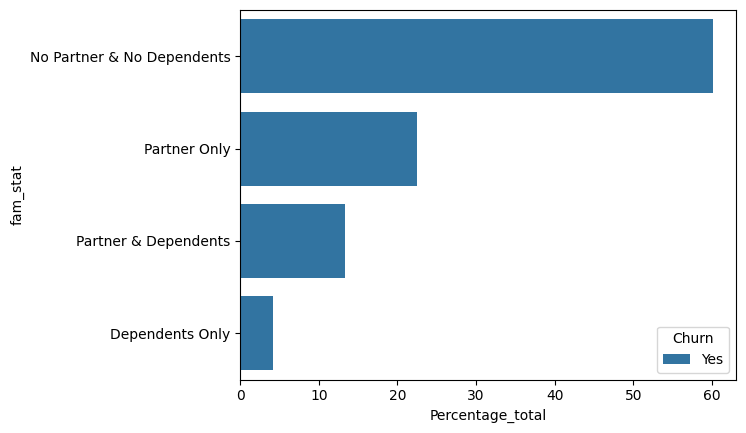

In [43]:
sns.barplot(x='Percentage_total',y='fam_stat',data=df_group, hue='Churn')

Jadi, dari plot di atas, dapat disimpulkan bahwa pada kategori **No Partner & No Dependents** memiliki tingkat churn paling tinggi sebesar **60%**, dan yang paling sedikir memiliki tingkat Churn yaitu pada kategori **Dependents Only** sebesar **4%**

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

# Soal Hard

## Buatlah satu insight dari data telco customer, dan sertakan storyline pada visualisasi tersebut! dengan hanya memanfaatkan atribut PaymentMethod, CustomerID, dan Churn!

In [45]:
# your code goes here!
df_st = pd.read_csv('telco_customer.csv')
df_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df_st.head()

In [57]:
df_st['Status']= np.where(
    (df_st['SeniorCitizen']==1)|(df_st['Partner']=='Yes')|(df_st['Dependents']=='Yes'),
    'Married','Single'
)
data=df_st[['customerID','tenure','Contract','MonthlyCharges','Status','Churn']]

In [101]:
df_gt = (data[data['Churn']=='Yes'].groupby('tenure').agg('customerID').nunique().reset_index())
df_gt

,tenure,customerID
0,1,380
1,2,123
2,3,94
3,4,83
4,5,64
...,...,...
67,68,9
68,69,8
69,70,11
70,71,6


In [102]:

df = data[data['Churn']=='Yes']
fig = px.histogram(df, x="tenure")
fig.show()